# Zomato Data Analysis

About Business: 

Zomato has an average of 17.5 million monthly
transacting customers for its food delivery business.e
average monthly active food delivery restaurant
partners on Zomato's platform have also increased by
8.7% year-on-year, from 208,000 to 226,000.we are
working in a data-driven role at Zomato. we have a
dataset of customers. As a data professional, we
need to analyze the data, perform EDA (Exploratory
Data Analysis) and visualization

Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 

Importing Our Data Set

In [2]:
data = pd.read_csv("Zomato_data.csv")

In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Dataset Description

| **Column Name**            | **Description**                                                           |
|-----------------------------|---------------------------------------------------------------------------|
| **Name**                   | Name of Restaurant                                                        |
| **Online_Order**           | Whether the order is online or offline (`Yes` for Online, `No` for Offline) |
| **book_table**             | Whether the customer booked a table or not (`Yes` or `No`)                |
| **rate**                   | Ratings given by the customer to the service (out of 5)                  |
| **votes**                  | Number of votes received                                                 |
| **approx_cost(for two peop)** | Approximate cost for two people                                          |
| **listed_in(type)**        | Restaurant type                                                          |


In [4]:
print(f"No of Rows: {data.shape[0]}")
print(f"No of Columns: {data.shape[1]}")

No of Rows: 148
No of Columns: 7


In [5]:
data.isnull().mean()*100

name                           0.0
online_order                   0.0
book_table                     0.0
rate                           0.0
votes                          0.0
approx_cost(for two people)    0.0
listed_in(type)                0.0
dtype: float64

In [6]:
data['rate'] = data['rate'].map(lambda x:x.split('/')[0]).astype("float")

In [7]:
data['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [8]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# Q1) What type of restaurant do the majority of customers order from?


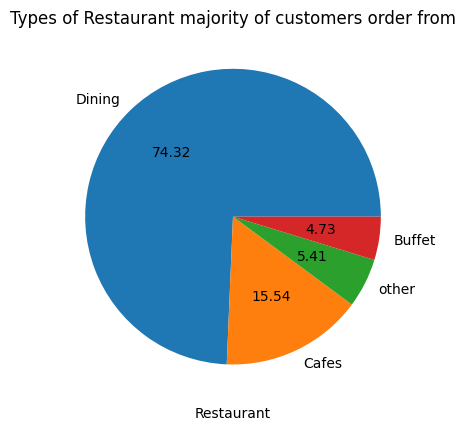

In [9]:
plt.title("Types of Restaurant majority of customers order from")
plt.pie(data["listed_in(type)"].value_counts(),labels=data["listed_in(type)"].value_counts().index,autopct="%.2f")
# ax.bar_label(container = ax.containers[0],labels=data["listed_in(type)"].value_counts(ascending=False).values)
plt.ylabel("")
plt.xlabel("Restaurant")
plt.show()

### Consclusion: Majority of Customers order from Dining Restaurant

# Q2) How many votes has each type of restaurant received from customers?

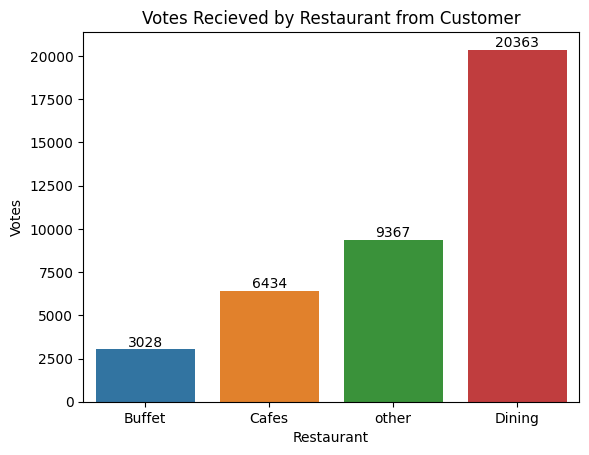

In [10]:
plt.title("Votes Recieved by Restaurant from Customer")
ax = sn.barplot(x=data["listed_in(type)"],y=data["votes"],estimator=sum,errorbar=None)
ax.bar_label(container=ax.containers[0],labels=data.groupby(["listed_in(type)"])["votes"].sum().sort_values(ascending=True))
plt.ylabel("Votes")
plt.xlabel("Restaurant")
plt.show()

### Conclusion: The analysis revealed that Dining Restaurants received the highest customer engagement, with a total of 20,363 votes, highlighting their popularity among users. This insight can help prioritize strategies to further enhance customer experience and engagement in this category.

# Q3) What are the ratings that the majority of restaurants have received?


c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


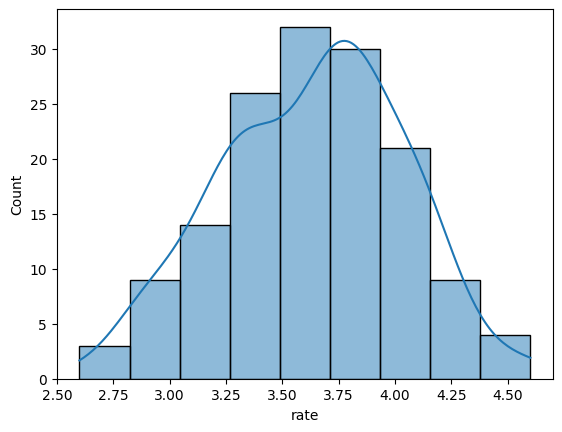

In [11]:
sn.histplot(data["rate"],kde=True)
plt.show()

### Conclusion: The majority of restaurants received ratings in the range of 3.5 to 3.75, indicating a generally favorable customer experience.

# Q4) Zomato has observed that most couples order most of their food online. What is their average  spending on each order?

c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


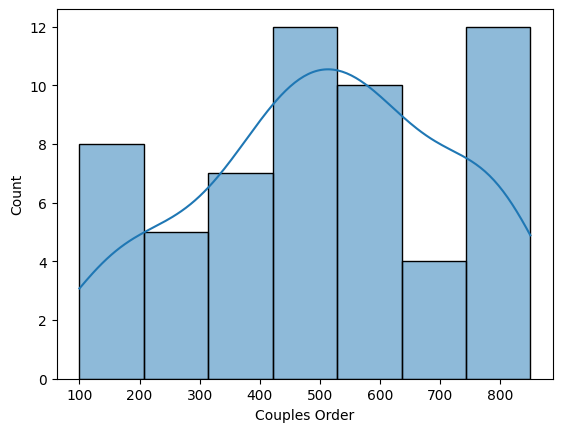

In [12]:
ax = sn.histplot(x=data["approx_cost(for two people)"][data["online_order"]=="Yes"],kde=True)
plt.xlabel("Couples Order")
plt.show()

### Conclusion: Most couples spend an average of ₹ 450 to ₹ 500 per order, providing valuable insights for pricing strategies and targeted promotions in this customer segment.

# Q5) Which mode (online or offline) has received the maximum rating?

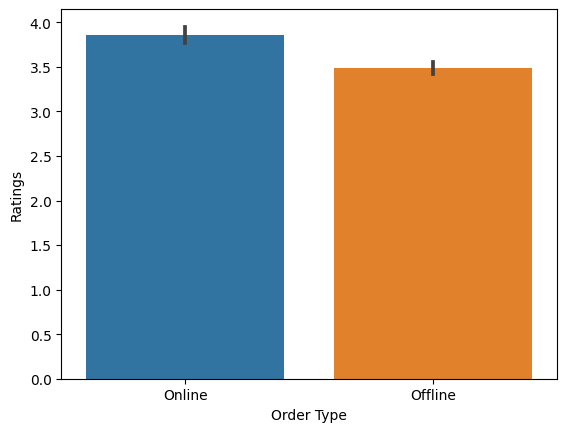

In [13]:
sn.barplot(x=data["online_order"],y=data["rate"]).set_xticklabels(["Online","Offline"])
plt.xlabel("Order Type")
plt.ylabel("Ratings")
plt.show()

### Conclusion: Online orders have received the highest ratings, with scores ranging from 3.75 to 4.20, indicating a positive customer experience for online ordering services.



# Q6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [14]:
group = data[data['online_order']=="No"].groupby(["listed_in(type)"])["online_order"].count().sort_values(ascending=False)

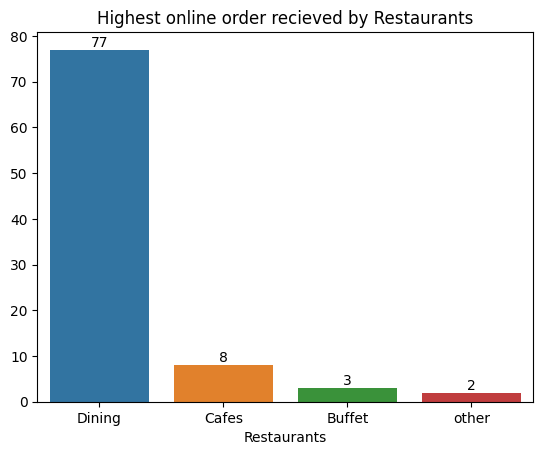

In [15]:
plt.title("Highest online order recieved by Restaurants")
ax=sn.barplot(x=group.index,y=group.values)
ax.bar_label(container=ax.containers[0],labels=group.values)
plt.xlabel("Restaurants")
plt.show()

### Conclusion: Dining has the highest total of 77 Offline orders, indicating strong Offline engagement in this restaurant category.